Google Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Mounted at /content/gdrive


Google Drive 파일 읽기 테스트

In [ ]:
import pandas as pd

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/"
df = pd.read_csv(dir + "test.csv")
df

,\theight\tweight\tlabel
0,0\t142\t62\tfat
1,1\t142\t73\tfat
2,2\t177\t61\tnormal
3,3\t187\t48\tthin
4,4\t153\t60\tfat


CIFAR-10 데이터 불러오기

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import time

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
print("before:",y_train[0:3])
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print("after:",y_train[0:3])

before: [[6]
 [9]
 [9]]
after: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print("before:",x_train[0])
x_train.shape

before: [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

CNN 모델 설계 및 가시화

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

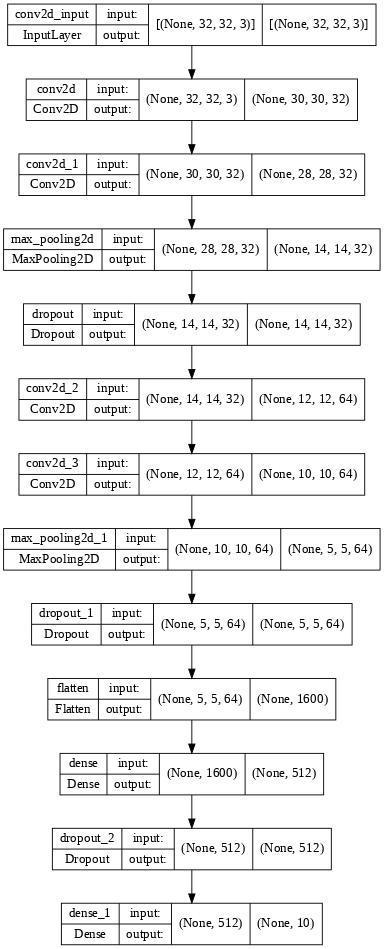

In [ ]:
# 모델 구조 설계
input_shape=(32,32,3)
n_kernals1=32
n_kernals2=64
n_hidden1=512
n_output=10

kernel_size=(3,3)
pool_size=(2,2)
strides=(1,1)

# Model hyperparameters
activation='relu'
kernel_initializer='glorot_uniform'
bias_initializer='zeros'
dropout_rate=[0.25,0.25,0.25]
l2_reg=0.0

# 모델 설계
cnn=Sequential()
cnn.add(Conv2D(n_kernals1,kernel_size,strides=strides,activation=activation,kernel_initializer=kernel_initializer,bias_initializer=bias_initializer,input_shape=input_shape))
cnn.add(Conv2D(n_kernals1,kernel_size,strides=strides,activation=activation,kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
cnn.add(MaxPooling2D(pool_size=pool_size))
cnn.add(Dropout(dropout_rate[0]))
cnn.add(Conv2D(n_kernals2,kernel_size,strides=strides,activation=activation,kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
cnn.add(Conv2D(n_kernals2,kernel_size,strides=strides,activation=activation,kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
cnn.add(MaxPooling2D(pool_size=pool_size))
cnn.add(Dropout(dropout_rate[1]))
cnn.add(Flatten())
cnn.add(Dense(n_hidden1,activation=activation))
cnn.add(Dropout(dropout_rate[2]))
cnn.add(Dense(n_output,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

# 모델 확인
cnn.summary()

# SVG로 그리기
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
%matplotlib inline
SVG(model_to_dot(cnn, show_shapes=True, dpi=65).create(prog='dot', format='svg'))  # SVG로 가시화
plot_model(cnn, to_file=dir+'cnn_cifar10.png', show_shapes=True, show_layer_names=True, dpi=65) # 파일 출력

모델 학습, 평가, 저장

In [ ]:
# Learning hyperparameters
batch_size=128
epochs=30
optimizer=Adam()

# 모델 학습
start=time.time()
cnn.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=2)
end=time.time()
print("학습시간(초):", end-start)

# 정확률 평가(1)
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률(%):",res[1]*100)

# 모델 저장
cnn.save(dir + "cnn_cifar10.h5")
print("Saved model to disk.")

Epoch 1/30
391/391 - 17s - loss: 1.6244 - accuracy: 0.4058 - val_loss: 1.2666 - val_accuracy: 0.5423 - 17s/epoch - 44ms/step
Epoch 2/30
391/391 - 4s - loss: 1.1933 - accuracy: 0.5750 - val_loss: 1.0522 - val_accuracy: 0.6303 - 4s/epoch - 10ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0124 - accuracy: 0.6419 - val_loss: 0.9425 - val_accuracy: 0.6701 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 0.8854 - accuracy: 0.6858 - val_loss: 0.8198 - val_accuracy: 0.7163 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 0.8067 - accuracy: 0.7155 - val_loss: 0.7760 - val_accuracy: 0.7311 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.7414 - accuracy: 0.7392 - val_loss: 0.7162 - val_accuracy: 0.7507 - 4s/epoch - 10ms/step
Epoch 7/30
391/391 - 4s - loss: 0.6878 - accuracy: 0.7562 - val_loss: 0.6867 - val_accuracy: 0.7603 - 4s/epoch - 9ms/step
Epoch 8/30
391/391 - 4s - loss: 0.6438 - accuracy: 0.7743 - val_loss: 0.6900 - val_accuracy: 0.7628 - 4s/epoch - 9ms/step
Epoch 9/30
391/3

모델 학습 그래프 그리기

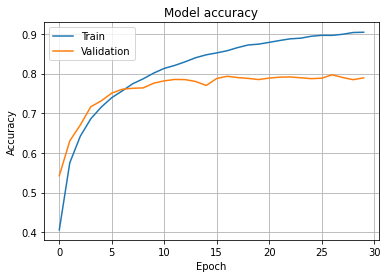

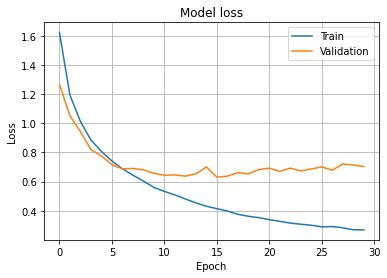

In [ ]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

테스트 결과 및 Confusion Matrix 그리기

In [ ]:
# 테스트 집합
res = cnn.predict(x_test)

# Confusion Matrix
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i].argmax()][y_test[i].argmax()]+=1
print(conf)

# 정확률 계산(2)
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("정확률(%):",accuracy*100)

[[823.  14.  49.  23.  16.  13.  13.   9.  46.  18.]
 [ 17. 911.   6.  15.   5.   6.   4.   4.  31.  54.]
 [ 38.   3. 683.  64.  44.  35.  33.  21.  12.   4.]
 [  9.   2.  47. 582.  52. 159.  37.  30.   6.   3.]
 [  5.   1.  66.  42. 745.  17.  22.  28.   2.   0.]
 [  6.   2.  46. 152.  35. 704.  16.  43.   6.   1.]
 [  7.   2.  55.  54.  42.  14. 862.   4.   4.   6.]
 [  8.   0.  24.  28.  51.  41.   3. 832.   3.   3.]
 [ 46.  13.  13.  17.   5.   2.   5.   2. 859.  22.]
 [ 41.  52.  11.  23.   5.   9.   5.  27.  31. 889.]]
정확률(%): 78.9


저장된 모델 불러오기 및 평가

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.python.keras.models import load_model

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn2 = load_model(dir + "cnn_cifar10.h5")
cnn2.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

res=cnn2.evaluate(x_test, y_test, verbose=0)
print("정확률(%):",res[1]*100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0